# Imports and constants

In [19]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

from Metrics import compute_metrics, make_metric_plots
import visualizer.Viewer as vw
from models.time_series.anomaly.machine_learning.TimeSeriesAnomalyKMeans import TimeSeriesAnomalyKMeans
from reader.NABTimeSeriesReader import NABTimeSeriesReader

# DATASET 1: ambient_temperature_system_failure
# DATASET 2: nyc_taxi
DATASET_PATH = "data/dataset/"
DATASET = "nyc_taxi.csv"
PURE_DATA_KEY = "realKnownCause/nyc_taxi.csv"
GROUND_WINDOWS_PATH = "data/dataset/combined_windows.json"

def preprocess(X) -> np.ndarray:
    return StandardScaler().fit_transform(X)

# Read the dataset

In [20]:
reader = NABTimeSeriesReader(DATASET_PATH)
all_df = reader.read(DATASET_PATH + DATASET).get_dataframe()

data_test = preprocess(np.array(all_df["value"]).reshape(all_df["value"].shape[0], 1))
data_test_labels = all_df["target"]
dataframe = all_df.copy()
dataframe["value"] = data_test

# Create model, classify and score

In [21]:
model = TimeSeriesAnomalyKMeans(window=3,
                                    classification="voting",
                                    anomaly_portion=0.0003,
                                    anomaly_threshold=0.9888,
                                    kmeans_params={"n_clusters": 4,
                                                   "random_state": 22})

true_labels = data_test_labels

labels = model.classify(data_test.reshape((-1, 1)))
scores = model.anomaly_score(data_test.reshape((-1, 1)))

# Evaluation metrics for anomaly detection

In [22]:
compute_metrics(true_labels, scores, labels, only_roc_auc=False)

ACCURACY SCORE:  0.993798449612403
PRECISION SCORE:  0.046153846153846156
RECALL SCORE:  0.6
F1 SCORE:  0.08571428571428573
AVERAGE PRECISION SCORE:  0.05079808450810228
PRECISION-RECALL AUC SCORE:  0.031761032459085674
AUROC SCORE:  0.7405913717886573


# Confusion matrix

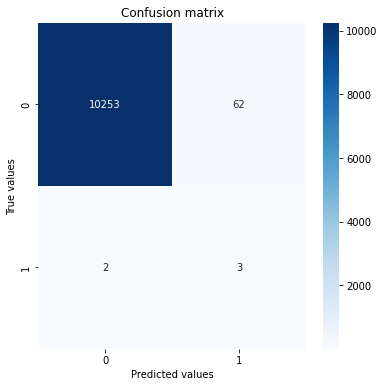

In [23]:
confusion_matrix = metrics.confusion_matrix(true_labels, labels)
vw.plot_confusion_matrix(confusion_matrix)

# ROC curve

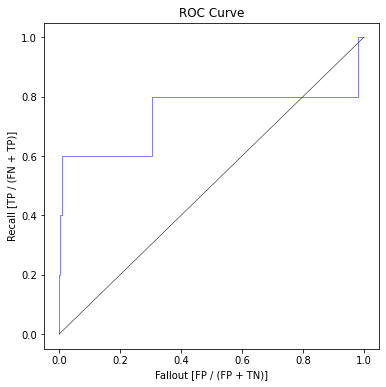

In [24]:
vw.plot_roc_curve(true_labels, scores)

# Precision-recall curve

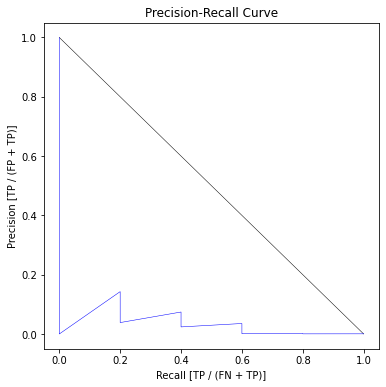

In [25]:
vw.plot_precision_recall_curve(true_labels, scores)

# Assigned labels

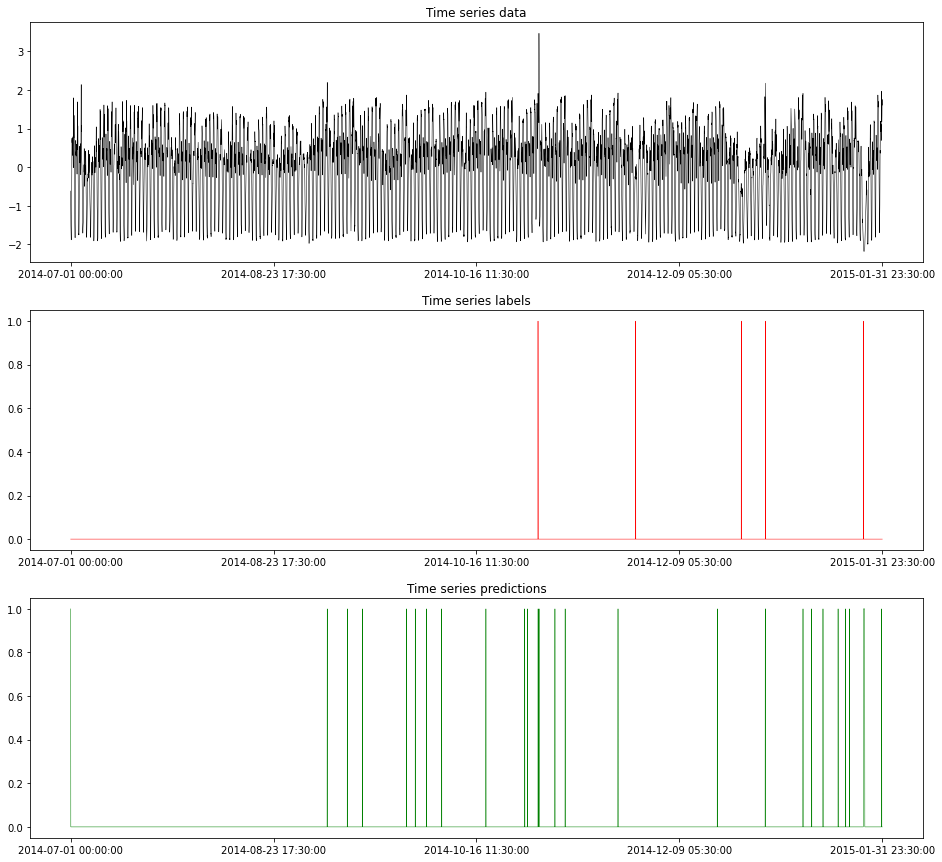

In [26]:
vw.plot_univariate_time_series_predictions(dataframe, labels)

# Assigned scores

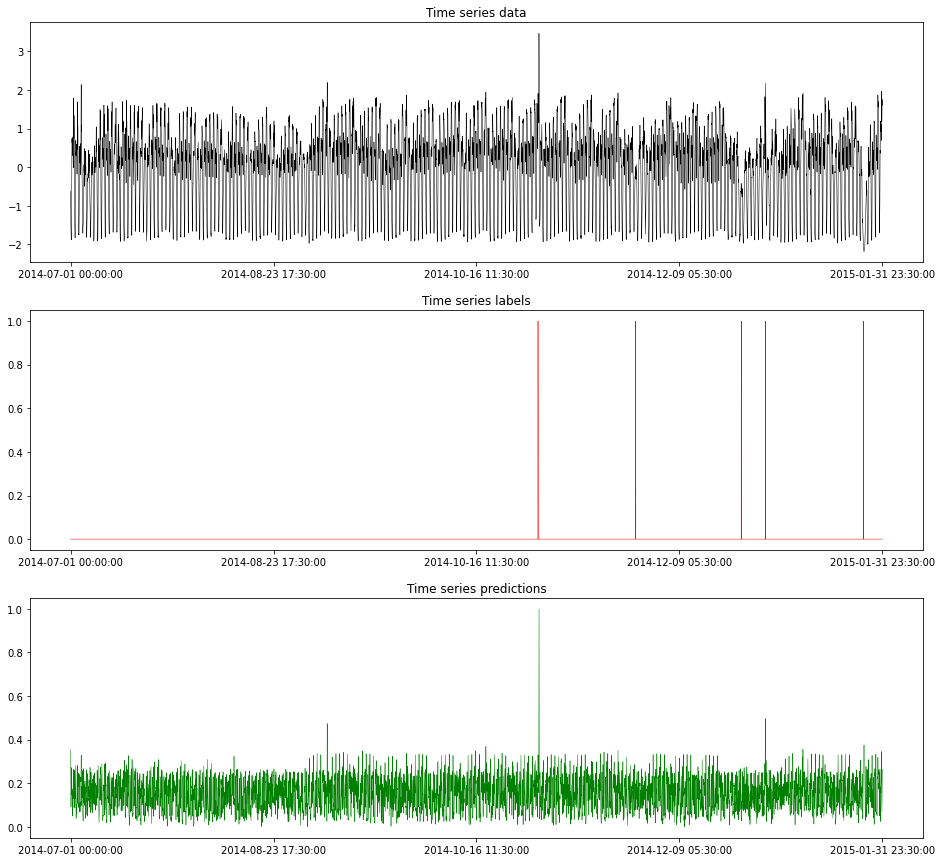

In [27]:
vw.plot_univariate_time_series_predictions(dataframe, scores)

# Anomalies predictions as red dots

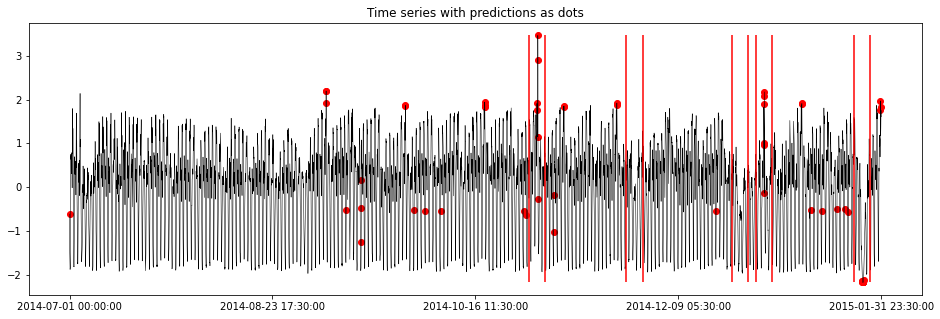

In [28]:
bars = vw.get_bars_indices_on_test_df(all_df,
                                      dataframe,
                                      PURE_DATA_KEY,
                                      GROUND_WINDOWS_PATH)
vw.plot_time_series_with_predicitons_bars(dataframe,
                                          labels,
                                          bars,
                                          pred_color='r')